## Wrangle and Analyze Data: We Rate Dogs ([@dog_rates]("https://twitter.com/dog_rates"))


A data analysis project focused on data wrangling efforts.



### Table of Contents
- [Introduction](#intro)
- [Gather](#gather)
- [Assess](#assess)
  - Detect and document at least **eight (8) quality issues** and **two (2) tidiness issues**
- [Clean](#clean)
- [Storing, Analyzing and Visualizing Data](#storing_analyzing_and_visualizing)
  - At least **three (3) insights** and **one (1) visualization** must be produced
- [Wrangling Efforts Report](#wranglingeffortsreport)
- [Communicate Findings Report](#communicatefindingsreport)
- [References](#references) 


<a id='intro'></a>
### Introduction


Real-world data rarely comes clean. Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. I will document my wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates]("https://twitter.com/dog_rates"), also known as [WeRateDogs]("https://twitter.com/dog_rates"). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs [downloaded their Twitter archive]("https://help.twitter.com/en/managing-your-account/how-to-download-your-twitter-archive") and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017

<a id='gather'></a>
### Gather


I will be gathering data from these three resources:

   1. The [WeRateDogs]("https://twitter.com/dog_rates") Twitter archive. The *twitter_archive_enhanced.csv* file was given.

   2.  The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file was provided.

   3. Twitter API and Python's Tweepy library to gather each tweet's retweet count and favorite or like count at minimum, and any additional data I find interesting. I will be generating this using my Twitter API key, secrets, and tokens. 

In [1]:
# import necessary libaries
import pandas as pd
import numpy as np

In [2]:
# loading the WeRateDogs twitter archive data
archive = pd.read_csv('twitter-archive-enhanced.csv')

archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# downloading the image prediction data programmatically
import requests
predicted_breeds_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(predicted_breeds_url)
with open('image_predictions.tsv', 'wb') as f:
    f.write(response.content)
    
# load image prediction data
image_predictions = pd.read_csv("image_predictions.tsv", sep='\t')

In [4]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
import tweepy 
consumer_key = 'HIDDEN' 
consumer_secret = 'HIDDEN' 
access_token = 'HIDDEN' 
access_secret = 'HIDDEN' 
# this secures my authentification codes above
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_secret) 
#this connects me to Twitter API
api = tweepy.API(auth)

In [6]:
api.me()

User(_api=<tweepy.api.API object at 0x7fb125624a90>, _json={'id': 2576944311, 'id_str': '2576944311', 'name': 'James Bronny', 'screen_name': 'BronAnalytics', 'location': 'Lagos, Nigeria', 'profile_location': {'id': '00817d75276a95cf', 'url': 'https://api.twitter.com/1.1/geo/id/00817d75276a95cf.json', 'place_type': 'unknown', 'name': 'Lagos, Nigeria', 'full_name': 'Lagos, Nigeria', 'country_code': '', 'country': '', 'contained_within': [], 'bounding_box': None, 'attributes': {}}, 'description': 'Keep sailings', 'url': 'https://t.co/TPFapEpk9A', 'entities': {'url': {'urls': [{'url': 'https://t.co/TPFapEpk9A', 'expanded_url': 'http://liqui-moly.com', 'display_url': 'liqui-moly.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 292, 'friends_count': 910, 'listed_count': 6, 'created_at': 'Mon Jun 02 08:44:13 +0000 2014', 'favourites_count': 1654, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 39

In [7]:
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [8]:
import json
import time

start = time.time()

tweet_ids = archive.tweet_id.values

tweets_data = []
tweet_success = []
tweet_failure = []

for tweet_id in tweet_ids:
        try:
            data = api.get_status(tweet_id, tweet_mode='extended', 
                                  wait_on_rate_limit = True, 
                                  wait_on_rate_limit_notify = True)
            tweets_data.append(data)
            tweet_success.append(tweet_id)
        except:
            tweet_failure.append(tweet_id)
            print(tweet_id)
         

        
end = time.time()

print(end - start)


888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
856330835276025856
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
779123168116150273
775096608509886464
771004394259247104
770743923962707968
766864461642756096
759923798737051648
759566828574212096
Rate limit reached. Sleeping for: 731
758740312047005698
754011816964026368
680055455951884288
Rate limit reached. Sleeping for: 734
1911.3184173107147


In [9]:
# storing data to tweet_json.txt
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweets_data, file)

In [10]:
# reading the API data stored in json file
df3 = pd.read_json('tweet_json.txt')
df3['tweet_id'] = tweet_success
df3 = df3[['tweet_id', 'retweet_count', 'favorite_count']]

In [11]:
df3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7201,34582
1,892177421306343426,5408,29977
2,891815181378084864,3573,22556
3,891689557279858688,7425,37837
4,891327558926688256,7962,36127


<a id='intro'></a>
### Assess

In [12]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
df3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7201,34582
1,892177421306343426,5408,29977
2,891815181378084864,3573,22556
3,891689557279858688,7425,37837
4,891327558926688256,7962,36127
5,891087950875897856,2677,18214
6,890971913173991426,1719,10612
7,890729181411237888,16207,58207
8,890609185150312448,3718,25090
9,890240255349198849,6260,28602


In [15]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [18]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
df3.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.418330e+17,2541.679416,7221.742587
std,6.824520e+16,4303.659517,11219.173292
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,512.500000,1254.500000
50%,7.178418e+17,1183.000000,3125.000000
75%,7.986692e+17,2941.500000,8816.000000
max,8.924206e+17,72861.000000,148329.000000


In [21]:
all_columns = pd.Series(list(archive) + list(image_predictions) + list(df3))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [22]:
list(archive)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [23]:
list(image_predictions)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [24]:
archive[archive['retweeted_status_user_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [25]:
archive.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Lola           10
Tucker         10
Penny          10
Bo              9
Winston         9
Sadie           8
the             8
Bailey          7
Buddy           7
Toby            7
an              7
Daisy           7
Oscar           6
Leo             6
Jax             6
Bella           6
Koda            6
Rusty           6
Scout           6
Jack            6
Milo            6
Stanley         6
Dave            6
Gus             5
             ... 
Pilot           1
Eugene          1
Furzey          1
Roscoe          1
Brandy          1
Noah            1
Herb            1
Beemo           1
Jeremy          1
Grady           1
Odin            1
Christoper      1
Pippin          1
Marq            1
Zeus            1
Berkeley        1
Richie          1
Nico            1
Karl            1
Bradley         1
Coleman         1
Lipton          1
Oddie           1
Jomathan        1
Sunshine  

In [26]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [27]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [28]:
archive.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
1079,739238157791694849,NaN,NaN,2016-06-04 23:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,None,None,None
2173,669324657376567296,NaN,NaN,2015-11-25 01:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ralf. He's a miniature Buick DiCaprio. Ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669324657...,11,10,Ralf,None,None,None,None
663,790946055508652032,NaN,NaN,2016-10-25 16:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Betty. She's assisting with the dishes...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790946055...,12,10,Betty,None,None,None,puppo
1626,684800227459624960,NaN,NaN,2016-01-06 18:14:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Theodore. He's dapper as hell. Probably o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684800227...,11,10,Theodore,None,None,None,None
1410,699036661657767936,NaN,NaN,2016-02-15 01:05:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HAPPY V-DAY FROM YOUR FAV PUPPER SQUAD 13/10 f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699036661...,13,10,None,None,None,pupper,None
1942,673711475735838725,NaN,NaN,2015-12-07 03:51:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10 htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673711475...,10,10,None,None,None,None,None
1991,672622327801233409,NaN,NaN,2015-12-04 03:43:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This lil pupper is sad because we haven't foun...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672622327...,12,10,None,None,None,pupper,None
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
1584,687096057537363968,NaN,NaN,2016-01-13 02:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper's New Year's resolution was to bec...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687096057...,11,10,None,None,None,pupper,None


In [29]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
beagle                        18
teddy                         18
Eskimo_dog                    18
Shetland_sheepdog             18
Maltese_dog                   18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [30]:
image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
Samoyed                            20
chow                               20
malinois                           20
miniature_pinscher                 20
toy_terrier                        20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [31]:
image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Pembroke                          27
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

In [32]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
515,811386762094317568,NaN,NaN,2016-12-21 01:44:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Craig. That's actually a normal sized ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811386762...,11,10,Craig,None,None,pupper,None
272,840761248237133825,NaN,NaN,2017-03-12 03:07:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Maddie and Gunner....,8.406323e+17,4.196984e+09,2017-03-11 18:35:42 +0000,"https://www.gofundme.com/3hgsuu0,https://twitt...",12,10,Maddie,None,None,None,None
1787,677565715327688705,NaN,NaN,2015-12-17 19:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Contortionist pup here. Inside pentagram. Clea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677565715...,6,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
2310,666786068205871104,NaN,NaN,2015-11-18 01:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unfamiliar with this breed. Ears pointy af. Wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666786068...,2,10,None,None,None,None,None


In [33]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1283,750429297815552001,https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg,1,golden_retriever,0.964929,True,Labrador_retriever,0.011584,True,refrigerator,0.007499,False
1951,863432100342583297,https://pbs.twimg.com/media/C_uG6eAUAAAvMvR.jpg,1,Staffordshire_bullterrier,0.690517,True,French_bulldog,0.103360,True,beagle,0.079489,True
1379,764857477905154048,https://pbs.twimg.com/media/Cp1R0ZTWcAAaPO4.jpg,1,Bernese_mountain_dog,0.792059,True,Appenzeller,0.155034,True,EntleBucher,0.038374,True
1431,773247561583001600,https://pbs.twimg.com/media/Crsgi9dWEAApQd8.jpg,1,seat_belt,0.713588,False,miniature_pinscher,0.083369,True,Brabancon_griffon,0.075696,True
897,699775878809702401,https://pbs.twimg.com/media/CbYac83W4AAUH1O.jpg,1,Dandie_Dinmont,0.271683,True,Old_English_sheepdog,0.164931,True,otterhound,0.105918,True


In [34]:
from IPython.display import Image 
Image(url = 'https://pbs.twimg.com/media/CU8v-rdXIAId12Z.jpg')

In [35]:
sum(archive.rating_numerator.isnull())

0

In [36]:
sum(archive.rating_denominator.isnull())

0

In [37]:
sum(archive.timestamp.isnull())

0

#### Quality

##### `archive` table

- Missing data in (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_url) columns
- Timestamp has +0000 at the end. Not in the right format
- Erroneous datatype (timestamp and retweeted status timestamp should be integer instead of string)
- Tweet id is integer instead of string
- Lowercase dog names such as *a, an, the, quite, my, such etc.* are unusual. all dog names in lowercase 
- Text shows there are retweets or replies in the data
- Extraction of numerator and denominator are incorrect

##### `image_predictions` table

- Tweet id is integer instead of string
- Names in Algorithm's predictions p1, p2, and p3 are sentence case sometimes, lowercase other times 
- Compound names in p1, p2 and p3 columns have underscore sometimes, hyphen other times

##### `df3` table

- Tweet id is integer instead of string



#### Tidiness

- One variable in four columns in `archive` table (doggo, floofer, pupper and puppo)
- df3 should be part of the `archive` table

<a id='clean'></a>
### Clean

Now it's time to fix the quality issues and tidiness issues spotted above 

In [38]:
archive_clean = archive.copy()
image_predictions_clean = image_predictions.copy()
df3_clean = df3.copy()

### Quality 

##### Erroneous Data Format

**`archive`**: Timestamp has +0000 at the end, making it recorded in pandas as object. Not in the right format

##### Define

Change timestamp to datetime format

##### Code

In [39]:
# remove +0000 from timestamp
archive_clean['timestamp'] = archive_clean['timestamp'].str.slice(start=0, stop=-6)

In [40]:
# convert timestamp to datetime
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'], 
                                            format = "%Y-%m-%d %H:%M:%S")

##### Test

In [41]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

In [42]:
archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


##### Erroneous Datatype

**`archive`: Tweet id is integer instead of string**

**`image_predictions`: Tweet id is integer instead of string**

**`df3`: Tweet id is integer instead of string**

##### Define

Change tweet id datatype to string 

##### Code

In [43]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
df3_clean['tweet_id'] = df3_clean['tweet_id'].astype(str)

##### Test

In [44]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [45]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [46]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null object
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


In [47]:
archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


##### Inconsistency In Name

**`archive`**:Names such as a, an, the, quite, my, such etc. are unusual. all dog names in lowercase

##### Define

Convert all non-dog names to np.nan. All non-dog names start with lowercase

##### Code

In [48]:
mask = archive_clean.name.str.islower()
column_name = 'name'
archive_clean.loc[mask, column_name] = np.nan

In [49]:
archive_clean.name.value_counts()

None          745
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Tucker         10
Penny          10
Lola           10
Bo              9
Winston         9
Sadie           8
Bailey          7
Buddy           7
Toby            7
Daisy           7
Milo            6
Stanley         6
Dave            6
Rusty           6
Jack            6
Leo             6
Koda            6
Scout           6
Bella           6
Jax             6
Oscar           6
Phil            5
Sunny           5
George          5
Alfie           5
             ... 
Eugene          1
Furzey          1
Roscoe          1
Brandy          1
Stu             1
Theo            1
Noah            1
Herb            1
Beemo           1
Bradley         1
Grady           1
Odin            1
Christoper      1
Pippin          1
Marq            1
Zeus            1
Berkeley        1
Richie          1
Nico            1
Jeremy          1
Karl            1
Coleman         1
Lipton          1
Jomathan        1
Sunshine  

In [50]:
archive_clean[archive_clean.name.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,NaN,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,NaN,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,NaN,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,NaN,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,NaN,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,NaN,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,NaN,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,NaN,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,NaN,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,NaN,None,None,pupper,None


`archives` table: **There are retweets and replies in the dataset**

##### Define
Filter the null values for the three columns related to retweets and check to verify them.

##### Code

In [51]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_timestamp.isnull()]

In [52]:
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isnull()]
archive_clean = archive_clean[archive_clean.in_reply_to_user_id.isnull()]

##### Test

In [53]:
archive_clean.retweeted_status_id.notnull().sum()

0

In [54]:
archive_clean.retweeted_status_user_id.notnull().sum()

0

In [55]:
archive_clean.retweeted_status_timestamp.notnull().sum()

0

In [56]:
archive_clean.in_reply_to_status_id.notnull().sum()

0

In [57]:
archive_clean.in_reply_to_user_id.notnull().sum()

0

`archive` table: **The extraction of numerator and denominator are incorrect**

##### Define
The extraction of the numerator and the denominator didn't seem to work fine, as floats were not extracted correctly. The extraction will be executed again and the results shall be stored in the DataFrame.

##### Code

In [58]:
rating = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand = True)
rating.columns = ['rating_numerator', 'rating_denominator']
rating['rating_numerator'] = rating['rating_numerator'].astype(float)

##### Test

In [59]:
archive_clean.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
0         1
Name: rating_numerator, dtype: int64

In [60]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1993 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), floa

In [61]:
archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


`image_predictions`: **Names in Algorithm's predictions p1, p2, and p3 are sentence case sometimes, lowercase other times**

##### Define
Change the breed names to the same format for consistency

##### Code

In [62]:
# change the image predictions' breed names to the same format for consistency
image_predictions_clean[["p1", "p2", "p3"]] = image_predictions_clean[["p1", "p2", "p3"]].apply(lambda x: x.str.lower(), axis=1)
image_predictions_clean[["p1", "p2", "p3"]]

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman
5,bernese_mountain_dog,english_springer,greater_swiss_mountain_dog
6,box_turtle,mud_turtle,terrapin
7,chow,tibetan_mastiff,fur_coat
8,shopping_cart,shopping_basket,golden_retriever
9,miniature_poodle,komondor,soft-coated_wheaten_terrier


##### Test

In [63]:
image_predictions_clean.p1.describe

<bound method NDFrame.describe of 0            welsh_springer_spaniel
1                           redbone
2                   german_shepherd
3               rhodesian_ridgeback
4                miniature_pinscher
5              bernese_mountain_dog
6                        box_turtle
7                              chow
8                     shopping_cart
9                  miniature_poodle
10                 golden_retriever
11                    gordon_setter
12                     walker_hound
13                              pug
14                       bloodhound
15                            lhasa
16                   english_setter
17                              hen
18                 desktop_computer
19                italian_greyhound
20                      maltese_dog
21                 three-toed_sloth
22                               ox
23                 golden_retriever
24                         malamute
25                       guinea_pig
26      soft-coated_wheaten_te

In [64]:
image_predictions_clean.p2.describe

<bound method NDFrame.describe of 0                         collie
1             miniature_pinscher
2                       malinois
3                        redbone
4                     rottweiler
5               english_springer
6                     mud_turtle
7                tibetan_mastiff
8                shopping_basket
9                       komondor
10               tibetan_mastiff
11             yorkshire_terrier
12              english_foxhound
13                  bull_mastiff
14               german_shepherd
15                      shih-tzu
16                  newfoundland
17                          cock
18                          desk
19                   toy_terrier
20                    toy_poodle
21                         otter
22                  newfoundland
23      chesapeake_bay_retriever
24                siberian_husky
25                         skunk
26                  afghan_hound
27                   toy_terrier
28                    bloodhound
29       

In [65]:
image_predictions_clean.p3.describe

<bound method NDFrame.describe of 0                 shetland_sheepdog
1               rhodesian_ridgeback
2                        bloodhound
3                miniature_pinscher
4                          doberman
5        greater_swiss_mountain_dog
6                          terrapin
7                          fur_coat
8                  golden_retriever
9       soft-coated_wheaten_terrier
10               labrador_retriever
11                         pekinese
12                     ibizan_hound
13                   french_bulldog
14                         malinois
15                   dandie_dinmont
16                           borzoi
17                        partridge
18                         bookcase
19                          basenji
20                 miniature_poodle
21                   great_grey_owl
22                      groenendael
23               labrador_retriever
24                       eskimo_dog
25                          hamster
26                           b

`image_predictions`: **Compound names in p1, p2 and p3 columns have underscore sometimes, hyphen other times**

##### Define
Use pandas apply function to make changes to compound names with hypen and underscore for consistency


##### Code

In [66]:
image_predictions_clean[["p1", "p2", "p3"]].apply(lambda x: x.str.replace("_", " ").str.title, axis=1)
image_predictions_clean[["p1", "p2", "p3"]]

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman
5,bernese_mountain_dog,english_springer,greater_swiss_mountain_dog
6,box_turtle,mud_turtle,terrapin
7,chow,tibetan_mastiff,fur_coat
8,shopping_cart,shopping_basket,golden_retriever
9,miniature_poodle,komondor,soft-coated_wheaten_terrier


##### Test

In [67]:
image_predictions_clean.p1.describe

<bound method NDFrame.describe of 0            welsh_springer_spaniel
1                           redbone
2                   german_shepherd
3               rhodesian_ridgeback
4                miniature_pinscher
5              bernese_mountain_dog
6                        box_turtle
7                              chow
8                     shopping_cart
9                  miniature_poodle
10                 golden_retriever
11                    gordon_setter
12                     walker_hound
13                              pug
14                       bloodhound
15                            lhasa
16                   english_setter
17                              hen
18                 desktop_computer
19                italian_greyhound
20                      maltese_dog
21                 three-toed_sloth
22                               ox
23                 golden_retriever
24                         malamute
25                       guinea_pig
26      soft-coated_wheaten_te

In [68]:
image_predictions_clean[["p1", "p2", "p3"]].apply(lambda x: x.str.replace("_", "-").str.title, axis=1)
image_predictions_clean[["p1", "p2", "p3"]]

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman
5,bernese_mountain_dog,english_springer,greater_swiss_mountain_dog
6,box_turtle,mud_turtle,terrapin
7,chow,tibetan_mastiff,fur_coat
8,shopping_cart,shopping_basket,golden_retriever
9,miniature_poodle,komondor,soft-coated_wheaten_terrier


##### Test

In [69]:
image_predictions_clean[["p1", "p2", "p3"]].describe

<bound method NDFrame.describe of                                p1                        p2  \
0          welsh_springer_spaniel                    collie   
1                         redbone        miniature_pinscher   
2                 german_shepherd                  malinois   
3             rhodesian_ridgeback                   redbone   
4              miniature_pinscher                rottweiler   
5            bernese_mountain_dog          english_springer   
6                      box_turtle                mud_turtle   
7                            chow           tibetan_mastiff   
8                   shopping_cart           shopping_basket   
9                miniature_poodle                  komondor   
10               golden_retriever           tibetan_mastiff   
11                  gordon_setter         yorkshire_terrier   
12                   walker_hound          english_foxhound   
13                            pug              bull_mastiff   
14                   

### Missing Data

**`archive`: Missing data in (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls) columns**

##### Define

Drop the columns in which missing data are present in the `archive` table. Since they are not going to be used in my analysis.

##### Code

In [70]:
# remove the columns in archive with missing data
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 
                              'retweeted_status_id', 
                              'retweeted_status_user_id', 
                              'retweeted_status_timestamp', 
                              'expanded_urls'], axis = 1)

##### Test

In [71]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1993 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 196.6+ KB


### Tidiness 

**Several columns in archive table contain similar variables**

##### Define

Replace *None* variables in the dog stage columns, then combine all stages to one column, separate the joint multiple stages and then convert the missing values to nan. In the end, drop individual stages from the archive table. 

##### Code

In [72]:
# handle None variables in the dog stage columns
archive_clean.doggo.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)

In [73]:
# merge all stages into one column
archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo
# drop individual stage columns
archive_clean = archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [74]:
# handle tweets with multiple stages
archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [75]:
# handle missing values
archive_clean.loc[archive_clean.dog_stage == '', 'dog_stage'] = np.nan

##### Test

In [76]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1993 non-null object
dog_stage             336 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 147.4+ KB


In [77]:
archive_clean.dog_stage.value_counts()

pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

**Dog breed predictions are not in should be a variable**

##### Define

Write a loop to select dog breed in the predictions variable

##### Code

In [78]:
# writing a loop to select dog breed
dog_prediction = []
for i in range (len(image_predictions_clean)):
    if image_predictions_clean['p1_dog'][i] == True:
        dog_prediction.append(image_predictions_clean.p1[i])
    elif image_predictions_clean['p2_dog'][i] == True:
        dog_prediction.append(image_predictions_clean.p2[i])
    elif image_predictions_clean['p3_dog'][i] == True:
        dog_prediction.append(image_predictions_clean.p3[i])
    else:
        dog_prediction.append("no prediction")

In [79]:
# create a new column from dog prediction list
image_predictions_clean['predictions'] = dog_prediction

##### Test

In [80]:
# check prediction
image_predictions_clean[['predictions', 'p1_dog', 'p1']]

,predictions,p1_dog,p1
0,welsh_springer_spaniel,True,welsh_springer_spaniel
1,redbone,True,redbone
2,german_shepherd,True,german_shepherd
3,rhodesian_ridgeback,True,rhodesian_ridgeback
4,miniature_pinscher,True,miniature_pinscher
5,bernese_mountain_dog,True,bernese_mountain_dog
6,no prediction,False,box_turtle
7,chow,True,chow
8,golden_retriever,False,shopping_cart
9,miniature_poodle,True,miniature_poodle


In [81]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id       2075 non-null object
jpg_url        2075 non-null object
img_num        2075 non-null int64
p1             2075 non-null object
p1_conf        2075 non-null float64
p1_dog         2075 non-null bool
p2             2075 non-null object
p2_conf        2075 non-null float64
p2_dog         2075 non-null bool
p3             2075 non-null object
p3_conf        2075 non-null float64
p3_dog         2075 non-null bool
predictions    2075 non-null object
dtypes: bool(3), float64(3), int64(1), object(6)
memory usage: 168.3+ KB


**All the table should be merged as one** 

##### Define

Merge df3_clean with archive_clean

##### Code

In [82]:
# check if the DataFrames have duplicates first
archive_clean['tweet_id'].duplicated().sum()

0

In [83]:
image_predictions_clean['tweet_id'].duplicated().sum()

0

In [84]:
df3_clean['tweet_id'].duplicated().sum()

0

In [85]:
# good! no duplicate. now we can combine the DataFrames
we_rate_dogs = pd.merge(archive_clean, 
                        df3_clean, on = 'tweet_id', how = 'left')

##### Test

In [86]:
we_rate_dogs.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,7201.0,34582.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,5408.0,29977.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,3573.0,22556.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,7425.0,37837.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,7962.0,36127.0


In [87]:
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 10 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1993 non-null object
dog_stage             336 non-null object
retweet_count         2088 non-null float64
favorite_count        2088 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 180.2+ KB


In [88]:
# checking for duplicates again
we_rate_dogs['tweet_id'].duplicated().sum()

0

**All the table should be merged as one** 

##### Define

Merge image_predictions_clean with we_rate_dogs

##### Code

In [89]:
we_rate_dogs2 = pd.merge(we_rate_dogs, 
                        image_predictions_clean, on = 'tweet_id', how = 'left')

##### Test

In [90]:
we_rate_dogs2.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,predictions
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,7201.0,34582.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,no prediction
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,5408.0,29977.0,...,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,chihuahua


In [91]:
we_rate_dogs2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 22 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1993 non-null object
dog_stage             336 non-null object
retweet_count         2088 non-null float64
favorite_count        2088 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                

<a id='storing_analyzing_and_visualizing_data'></a>
### Storing, Analyzing and Visualizing Data
Store the clean DataFrame in a csv file named `twitter_archive_master.csv`

Analyze and visualize my wrangled data. At least, **three (3) insights and one(1) visualization** must be produced


Drawing conclusions and creating visuals to communicate results. The following questions are addressed

**Q1:** What are the features that influence retweet count and favorite count?

**Q2:** Is rating influenced by dog stage? What are the dog stages with the highest rating?

**Q3:** What is the most popular dog name?

In [92]:
# store the clean DataFrame in a csv file named twitter_archive_master.csv
we_rate_dogs2.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [93]:
# import necessary libaries
import datetime 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# load the clean data
df = pd.read_csv('twitter_archive_master.csv')

###### Exploring with Visuals


In [94]:
# create rating column
df['rating'] = df.rating_numerator/df.rating_denominator

In [95]:
#create new column for dog breeds substituting single breeds for "other"
# value counts for all the dog breeds
vc = df.predictions.value_counts()
# get the breeds that have a value count of less than 10
singles = vc[vc<10].index.tolist()
# new column for dog breeds
df['breed_group'] = df['predictions']
# replace strings in single list with string 'other'
df['breed_group'].replace(singles, 'other', inplace = True)

In [96]:
# get the average rating only for each breed
rating2 = df.groupby('breed_group').rating.mean()
rating2

breed_group
airedale                          0.983333
american_staffordshire_terrier    1.031250
basset                            1.070588
beagle                            1.015000
bernese_mountain_dog              1.127273
blenheim_spaniel                  1.110000
border_collie                     1.058333
borzoi                            1.000000
boston_bull                       0.941667
boxer                             1.054545
cardigan                          1.114286
chesapeake_bay_retriever          1.083871
chihuahua                         1.049293
chow                              1.141667
cocker_spaniel                    1.133333
collie                            1.090909
dalmatian                         0.933333
english_springer                  1.050000
eskimo_dog                        1.140909
french_bulldog                    1.119355
german_shepherd                   1.100000
golden_retriever                  1.167607
great_dane                        0.981818

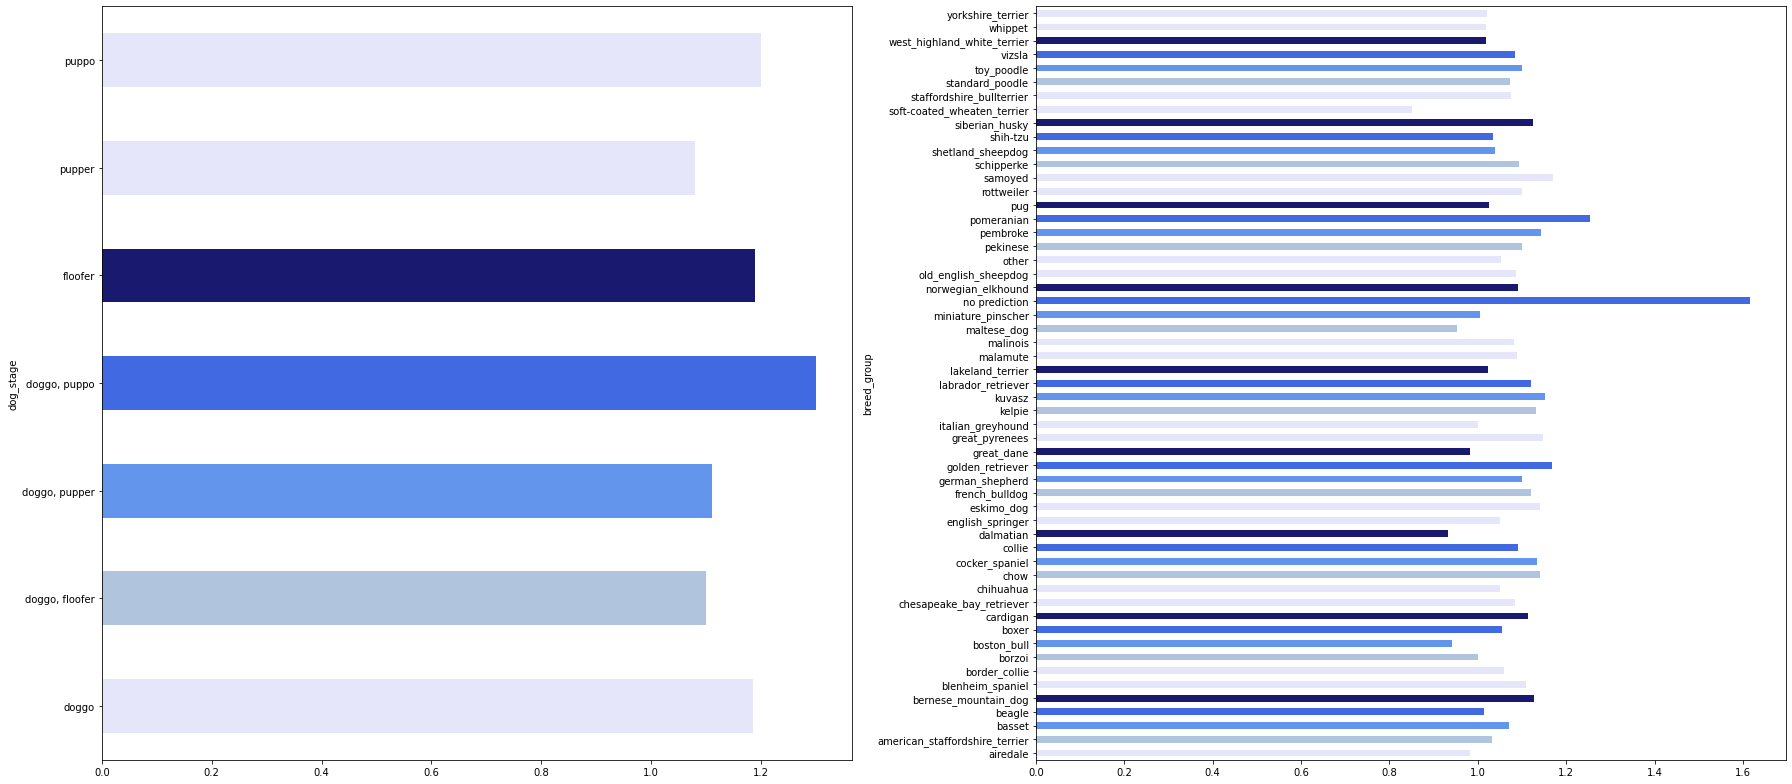

In [97]:
# the index for this series is the breed
# the value is the average rating
# plotting these directly in pandas:
# plot average rating of breed group and dog stage
fig, axes = plt.subplots(1,2)
rating = df.groupby('breed_group').rating.mean()
rating.plot.barh(ax = axes[1], align = 'center', color = ['lavender', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'midnightblue'], figsize = [5,11])
rating2 = df.groupby('dog_stage').rating.mean()
rating2.plot.barh(ax = axes[0], align = 'center', color = ['lavender', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'midnightblue'])
plt.subplots_adjust(wspace = 0.4)
fig.set_figwidth(25)
plt.tight_layout()
plt.show()

Dog breed with **no prediction** which is where no dog breed exist, has the highest average rating. Average rating for dog breeds is below 1.4

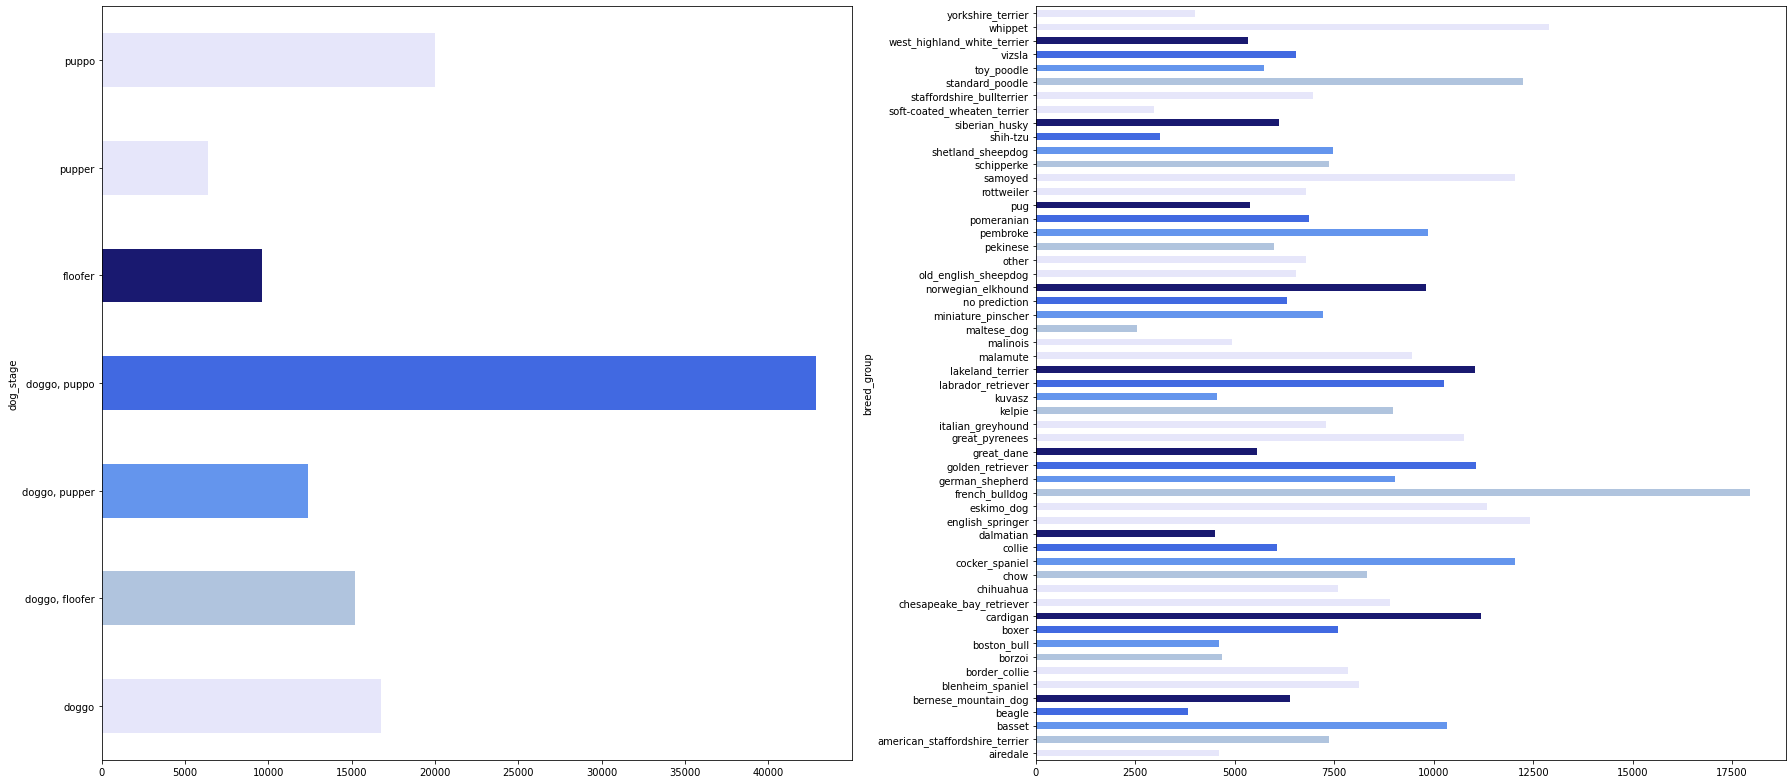

In [98]:
# plot average favorite count for dog stage and breed group
fig, axes = plt.subplots(1,2, figsize = [5,11])

rating = df.groupby('dog_stage').favorite_count.mean()
rating.plot.barh(ax = axes[0],align = 'center', color = ['lavender', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'midnightblue'])

rating2 = df.groupby('breed_group').favorite_count.mean()
rating2.plot.barh(ax = axes[1],align = 'center', color = ['lavender', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'midnightblue'])

plt.subplots_adjust(wspace =0.4)
fig.set_figwidth(25)

plt.tight_layout()

plt.show()

There is a big difference in average favorite count for the combined dog stage **doggo, puppo** compare to other stages. This factor is subject to further findings

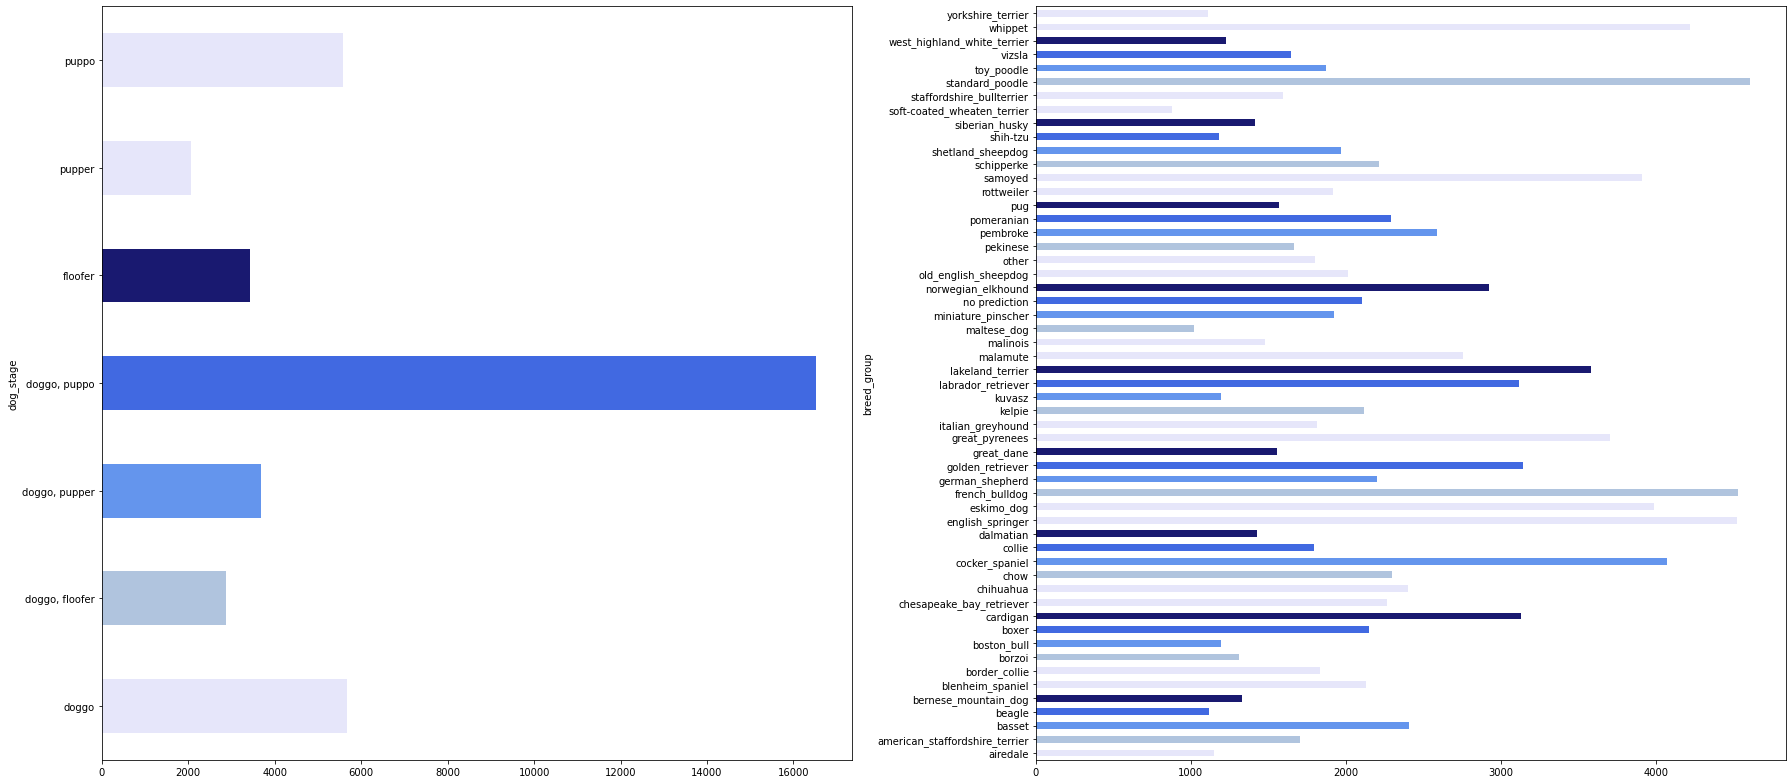

In [99]:
# plot average retweet count for dog stage and breed group
fig, axes = plt.subplots(1,2, figsize = [5,11])

rating = df.groupby('dog_stage').retweet_count.mean()
rating.plot.barh(ax = axes[0],align = 'center', color = ['lavender', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'midnightblue'])

rating2 = df.groupby('breed_group').retweet_count.mean()
rating2.plot.barh(ax = axes[1],align = 'center', color = ['lavender', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'midnightblue'])

plt.subplots_adjust(wspace =0.4)
fig.set_figwidth(25)

plt.tight_layout()

plt.show()

There is a big difference in average retweet count for the combined dog stage **doggo, puppo** compare to other stages. This factor is also subject to further findings in our analysis

**Q1:** What are the features that influence retweet count and favorite count?

In [100]:
p_breed_retweet = df[~df['breed_group'].isin(['no prediction'])].retweet_count.mean()
p_breed_favorite = df[~df['breed_group'].isin(['no prediction'])].favorite_count.mean()
p_stage_retweet = df[~df['breed_group'].isin(['no prediction'])].retweet_count.mean()
print('average retweet count for all dog breeds except no prediction = %f' %df[~df['breed_group'].isin(['no prediction'])].retweet_count.mean())
print('average favorite count for all dog breeds except no prediction = %f' %df[~df['breed_group'].isin(['no prediction'])].favorite_count.mean())
print('average rating for all dog breeds under no prediction = %f' %df[df['predictions'].isin(['no prediction'])].rating.mean())
print('average rating for all dog breeds under other = %f' %df[df['predictions'].isin(singles)].rating.mean())

average retweet count for all dog breeds except no prediction = 2417.468873
average favorite count for all dog breeds except no prediction = 8249.713404
average rating for all dog breeds under no prediction = 1.615410
average rating for all dog breeds under other = 1.051362


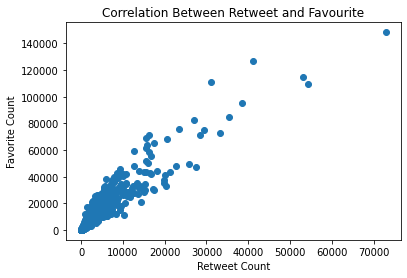

In [101]:
# correlation between retweet count and favorite count
plt.scatter(df.retweet_count, df.favorite_count)
plt.title('Correlation Between Retweet and Favourite')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')

plt.show();

There is a positive correlation between retweet count and favorite count

In [104]:
df = df.astype({'dog_stage': 'category'})

In [105]:
# install a pip package in the current Jupyter kernel to update the seaborn libary
import sys
!{sys.executable} -m pip install seaborn -U

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.1)


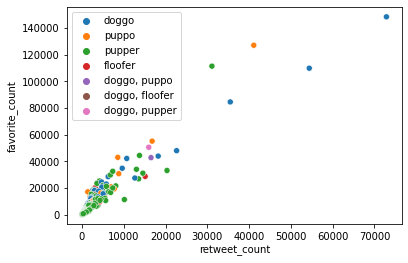

In [106]:
sns.scatterplot(data = df, x='retweet_count', y='favorite_count', hue = df.dog_stage.tolist());

Here, we can see that there is a positive correlation between retweet count and favorite count across the dog stages, with **doggo** having the strongest

Therefore, dog stage influences the reetweet count and favorite count 

**Q2:** Is rating influenced by dog stage? What are the dog stages with the highest rating?



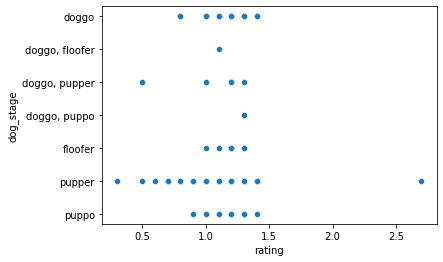

In [107]:
sns.scatterplot(data = df, x = 'rating', y = 'dog_stage');

Now let's check the relationship between rating and each dog stage excluding the outliers

In [108]:
# filter out the outliers in rating
rating_within = df[df['rating']<2.5]

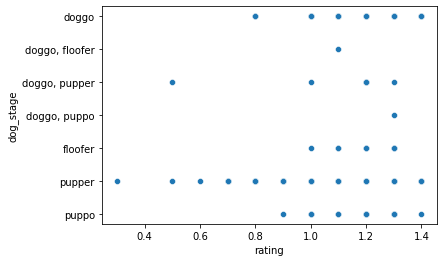

In [109]:
sns.scatterplot( data = rating_within, x = 'rating' , y = 'dog_stage');

This visual shows that **doggo**, **pupper** and **puppo** have the highest rating

**Q3:** What are the most popular dog names and dog breed?

In [110]:
# df.name.value_counts()

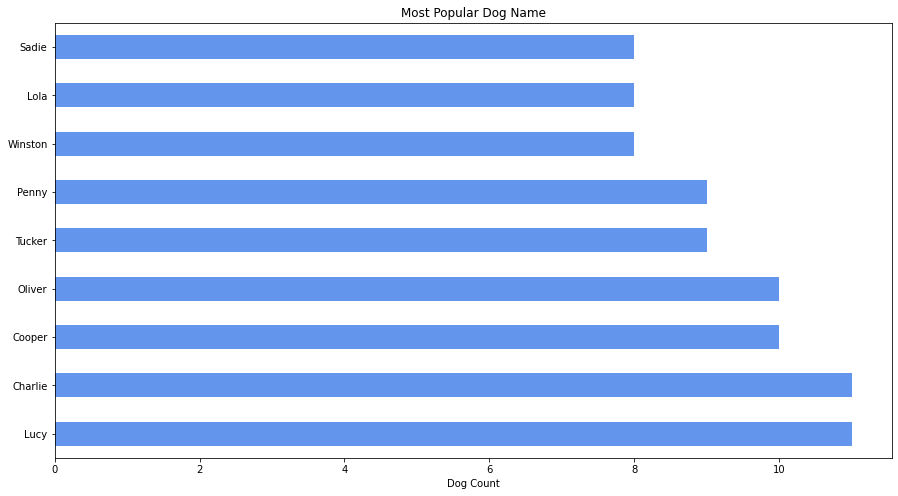

In [111]:
df.name.value_counts()[1:10].plot('barh', figsize=(15,8), color = 'cornflowerblue', title='Most Popular Dog Name').set_xlabel("Dog Count");

Lucy and Charlie are the most popular dog names followed by Cooper and Oliver.

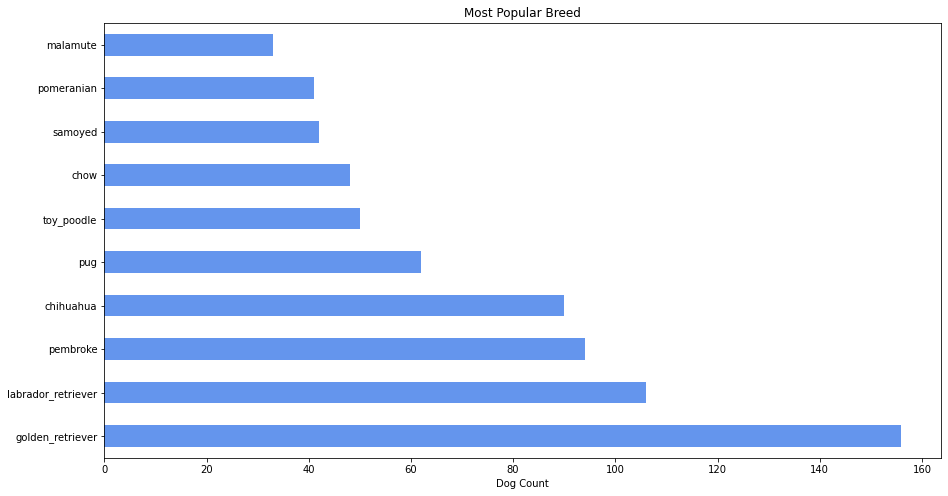

In [112]:
df.breed_group.value_counts()[2:12].plot('barh', figsize=(15,8), color = 'cornflowerblue', title='Most Popular Breed').set_xlabel("Dog Count");

Most Popular breed are Golden Retriever, Labrador Retriever and Pembroke in that order

<a id='references'></a>
### References

Downloading image prediction file. https://knowledge.udacity.com/questions/641740

Parsing the json file to pandas DataFrame https://github.com/tweepy/tweepy/issues/1102

Converting to np.nan https://knowledge.udacity.com/questions/588409

Extraction of ratings https://udacity-reviews-uploads.s3.us-west-2.amazonaws.com/_attachments/251099/1598725409/Capture2.JPG

Filtering retweets from archive table https://knowledge.udacity.com/questions/314510

Combining dog stages https://knowledge.udacity.com/questions/321950

Dog predictions column https://knowledge.udacity.com/questions/369845

Merging DataFrames https://knowledge.udacity.com/questions/511144

Exploring with visuals https://knowledge.udacity.com/questions/458203

Updating package in the current kernel https://knowledge.udacity.com/questions/62699

Plotting with Seaborn https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Plotting with Matplotlib https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar

